<a id='I' name="I"></a>
## [Introduction](#P0)

This notebook acts as a helper to prepare data for training a machine learning model.   
Ideal workflow:   
- Read the dataset information and details at the source.
- Download the dataset using pandas.
- List all the columns and try to interpret each one.
- Identify artifacts and other unusual things at first.
- Use analyse dataframe to do analysis - level 2.
- Exploratory data analysis
- Feature selection
- Scaling and normalization
- Data splitting - Train test validation

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Magics

### Packages

In [1]:
# General
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


### Custom classes and functions

In [2]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/Users/ayushyapare/Desktop/Ayushya/Snippets')

from DataFrame_Analysis import analyze_dataframe

### Global Parameters Setting

In [3]:
plt.style.use("ggplot")

## Data Retrieval and introduction


__Adult Census Income__: Dataset consisting of cencus information for adult population and the model predicts if their salary is >50K based on that information.

#### Download Data

In [4]:
# import the dataset
df = pd.read_csv('')

#### Data exploration

In [5]:
# Basic:
# 1. Shape
# 2. Columns - look for artifacts in column name
# 3. Info - look for appropriate datatypes 
# 4. Describe - look for min max mean and std. 

In [6]:
df.shape

(32561, 15)

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [8]:
# some columns have a '.' in the column name (must correct)
# 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
# Initial observations

In [12]:
# Find duplicate values and remove duplicates
# Find missing values
# Find wrong values like ?, none, -, etc. 
# fill with 'unknown'

#----------------------
# In any column - group some values to new cateories
# 
# ---------------------
# If there is a date time column, then extract the day, month and year separately
# as object datatypes
#----------------------
# Some columns can be dropped
# Some columns have unwanted space ' ' in the name, remove if that is the case
#-----------------------
# After the cleaning save the cleaned dataframe in csv format


In [13]:
# Check for missing values in the DataFrame
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [25]:
# Display all duplicate rows
# Identify duplicate rows
df.duplicated().sum()


24

In [26]:
# Remove duplicate(if any)
df_cleaned = df.drop_duplicates(keep = 'first')


In [27]:
# Replace incorrect or placeholder values with 'unknown'
incorrect_values = ['?', 'none', '-', 'N/A', 'nan', 'NULL']
df_cleaned.replace(incorrect_values, 'unknown', inplace=True)


In [ ]:
# Replace 'col_name' with the actual column name and adjust the mapping as needed
group_mapping = {
    'value1': 'category1',
    'value2': 'category2',
}
# col_name = 
df_cleaned['col_name'] = df_cleaned['col_name'].map(group_mapping).fillna(df_cleaned['col_name'])


In [29]:
# Convert the 'datetime_col' to datetime if not already in datetime format
df_cleaned['datetime_col'] = pd.to_datetime(df_cleaned['datetime_col'], errors='coerce')

# Extract day, month, and year as separate columns
df_cleaned['day'] = df_cleaned['datetime_col'].dt.day.astype('str')
df_cleaned['month'] = df_cleaned['datetime_col'].dt.month.astype('str')
df_cleaned['year'] = df_cleaned['datetime_col'].dt.year.astype('str')


In [ ]:
# Drop unwanted columns
columns_to_drop = ['col1', 'col2', 'col3'] 
df_cleaned.drop(columns=columns_to_drop, inplace=True)

In [30]:
# Remove leading and trailing spaces from column names
df_cleaned.columns = df_cleaned.columns.str.strip()


In [32]:
# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv('../data/processed/adult_cleaned.csv', index=False)

In [33]:
df = df_cleaned

In [34]:
# Advanced (Separate categorical and numerical)
# 1. value counts | Unique values | Missing values
# 2. Explore column of interest
#    1. Hist / Countplot
#    2. Boxplot

--------------------Categorical features -------------------------
--------------------Workclass-------------------------


workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

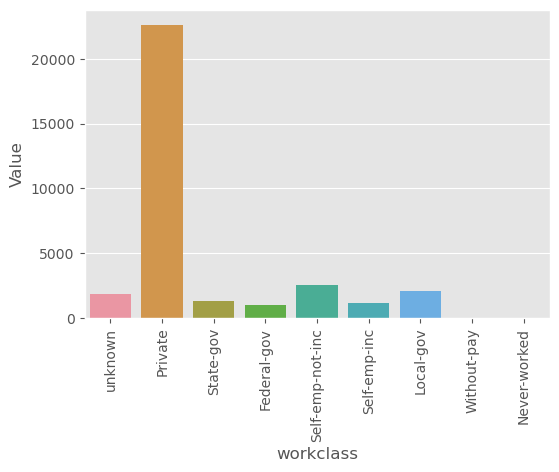

--------------------Education-------------------------


education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

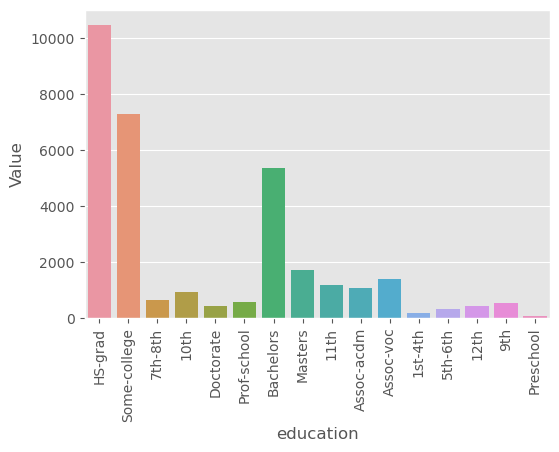

--------------------Marital.Status-------------------------


marital.status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

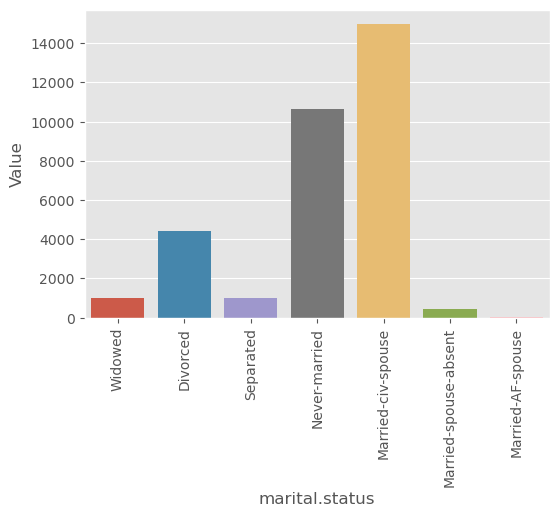

--------------------Occupation-------------------------


occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
unknown              1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

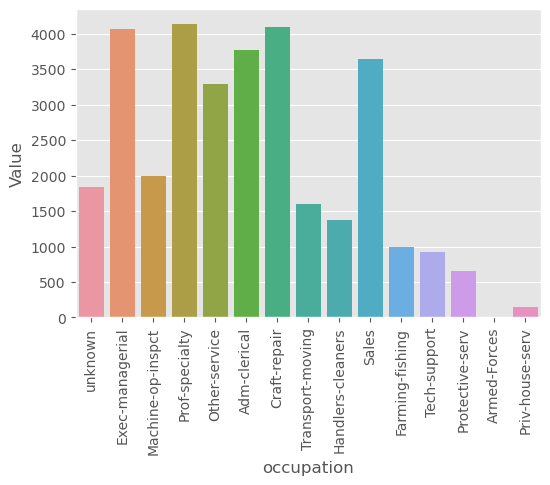

--------------------Relationship-------------------------


relationship
Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: count, dtype: int64

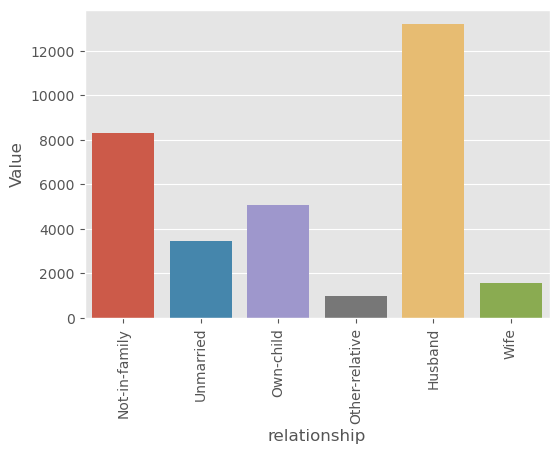

--------------------Race-------------------------


race
White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

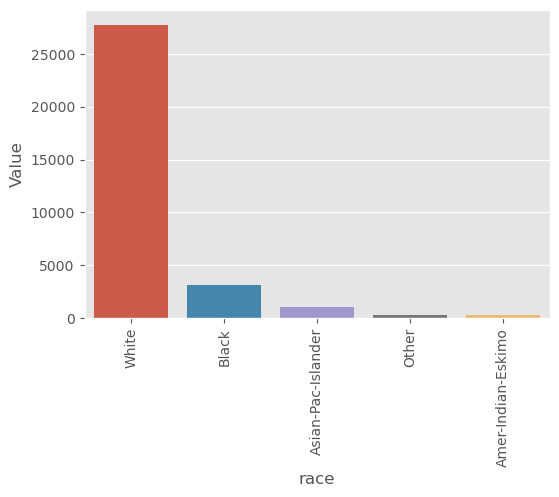

--------------------Sex-------------------------


sex
Male      21775
Female    10762
Name: count, dtype: int64

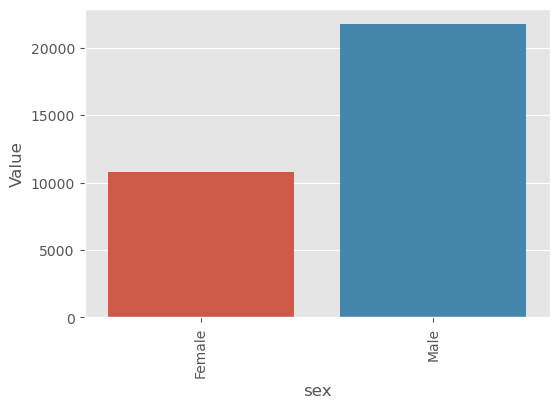

--------------------Native.Country-------------------------


native.country
United-States                 29153
Mexico                          639
unknown                         582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

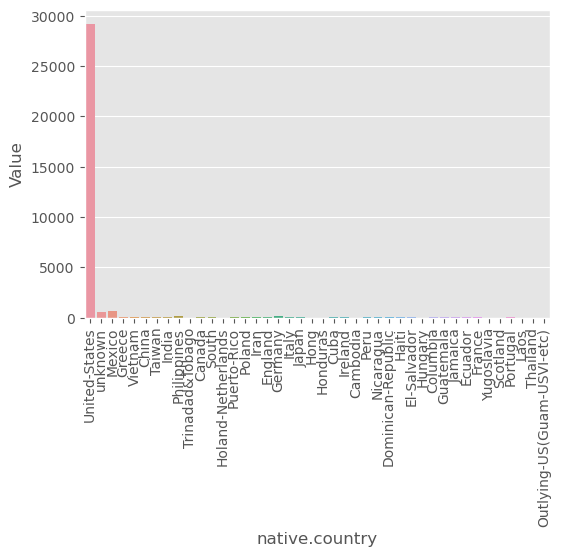

--------------------Income-------------------------


income
<=50K    24698
>50K      7839
Name: count, dtype: int64

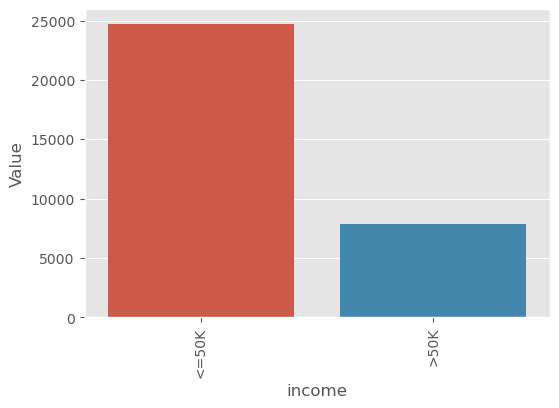

--------------------Numerical features -------------------------
--------------------Age-------------------------


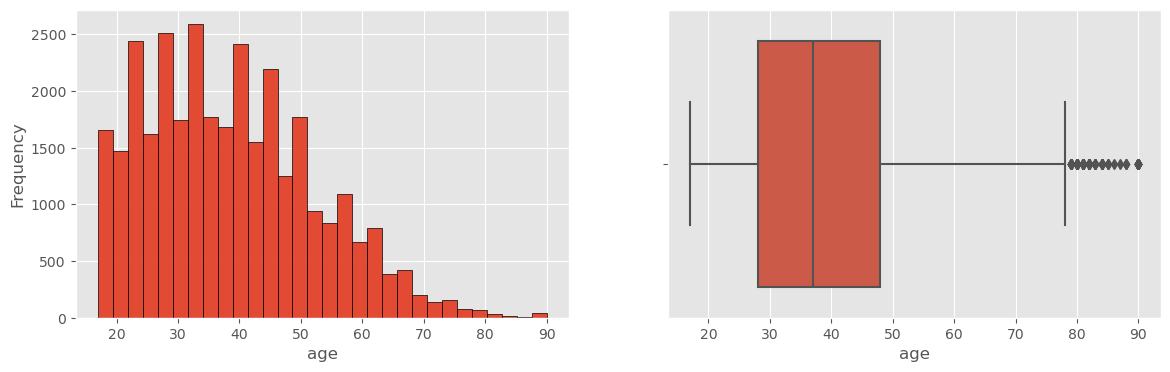

--------------------Fnlwgt-------------------------


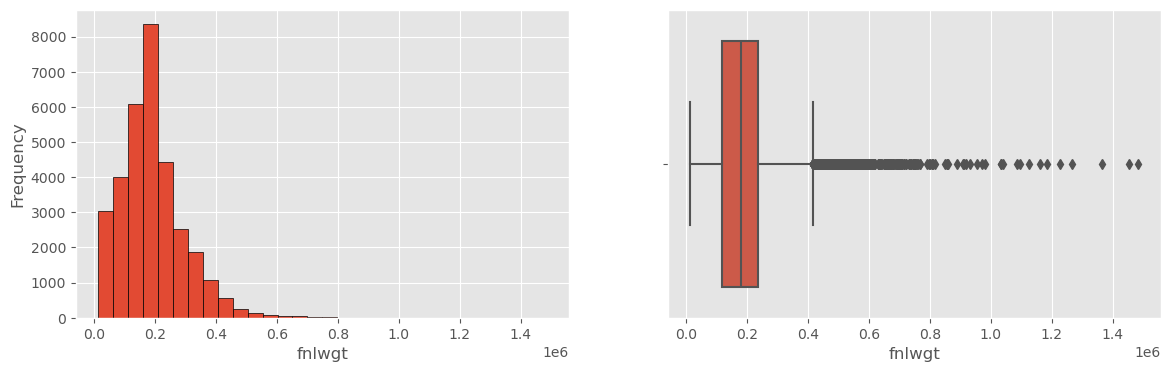

--------------------Education.Num-------------------------


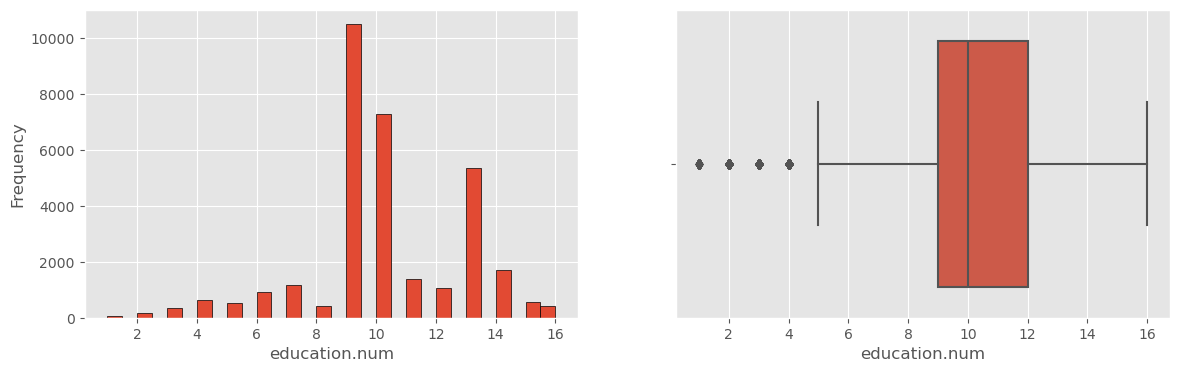

--------------------Capital.Gain-------------------------


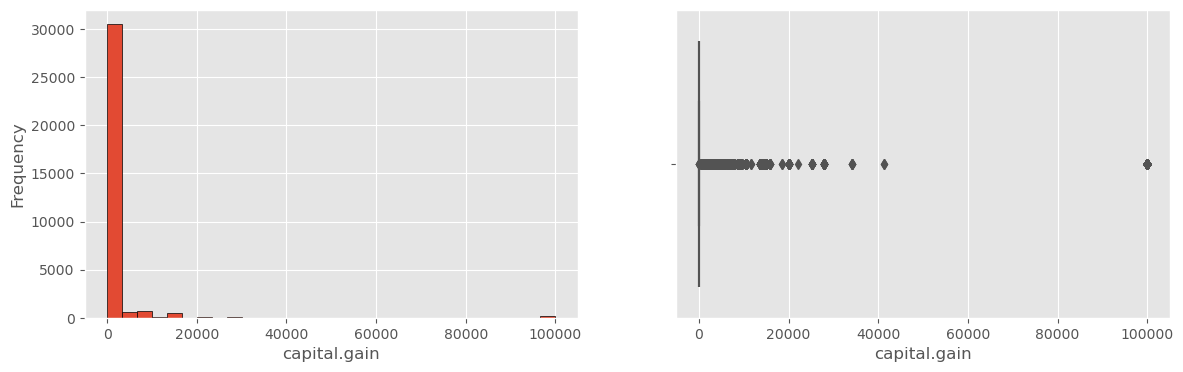

--------------------Capital.Loss-------------------------


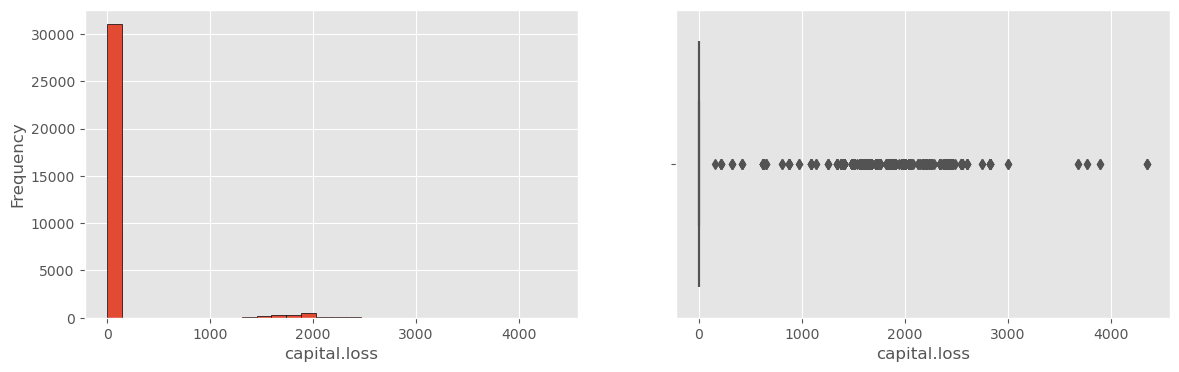

--------------------Hours.Per.Week-------------------------


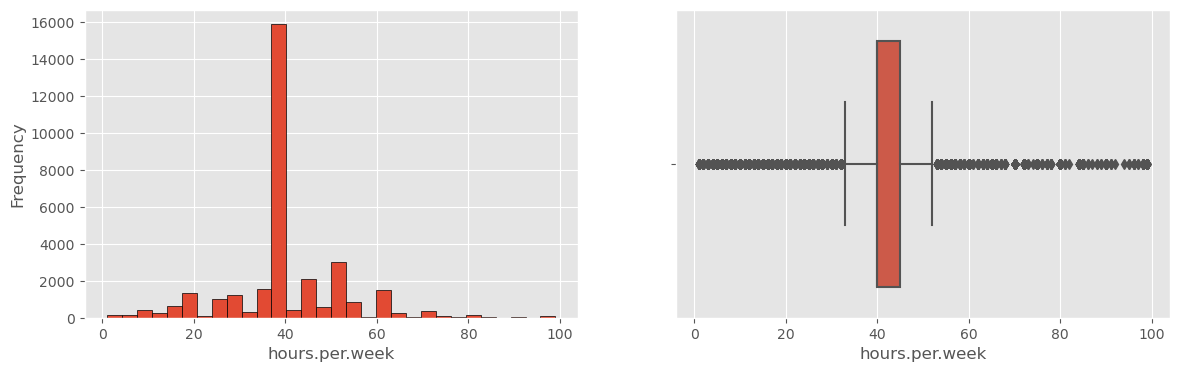

In [36]:
from IPython.display import display

# Separate categorical and numeric columns
cat_col = df.select_dtypes(include=['object', 'category'])
num_col = df.select_dtypes(include=['number'])

# Display categorical columns
print(f"--------------------Categorical features -------------------------")
for col in cat_col.columns:
    print(f"--------------------{col.title()}-------------------------")
    display(df[col].value_counts())
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

# Display numerical columns
print(f"--------------------Numerical features -------------------------")

for col in num_col.columns:
    print(f"--------------------{col.title()}-------------------------")
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # Histogram
    axes[0].hist(df[col], bins=30, edgecolor='k')
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    
    # Boxplot
    sns.boxplot(x=col, data=df, ax=axes[1])
    axes[1].set_xlabel(col, fontsize=12)
    
    plt.show()


#### Perform exploratory data analysis on each column

+- Native.Country, Occupation, Workclass has unknown values represented by ?

- 9th, 10th, 11th, 12th comes under HighSchool Grad but it has mentioned separately
- Create Elementary object for 1st-4th, 5th-6th, 7th-8th

- Married-civ-spouse,Married-spouse-absent,Married-AF-spouse comes under category Married
- Divorced, separated again comes under category separated.

- Self-emp-not-inc, Self-emp-inc comes under category self employed
- Local-gov,State-gov,Federal-gov comes under category goverment emloyees 
     


Feature Removal`

- Education num and education are giving similar information 
- Relationship and marital status imply similar information.Hence keeping only one of the two.

<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>